## Data Exploration

In [14]:
pip install pathlib

Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
from pathlib import Path
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Ensure project root is in sys.path
project_root = Path.cwd()
if project_root.name == "notebooks":
    project_root = project_root.parent

if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

print(f"Project root added to sys.path: {project_root}")

Project root added to sys.path: c:\Users\PRiba\OneDrive - STADA Arzneimittel AG\Escritorio\Python Tests\VN2\VN2-inventory_optimization


In [17]:
from utils.data_format import wide_to_long_sales

In [18]:
file_path = project_root / 'data' / 'Week0' / 'Week 0 - 2024-04-08 - Sales.csv'
sales = pd.read_csv(file_path)
sales = wide_to_long_sales(sales)
print(sales.head())


   Store  Product       Date  Sales
0      0      126 2021-04-12    0.0
1      0      126 2021-04-19    0.0
2      0      126 2021-04-26    3.0
3      0      126 2021-05-03    3.0
4      0      126 2021-05-10    0.0


In [19]:
# Check for na's or duplicated values
sales.isna().sum()
sales.duplicated(subset=['Store','Product','Date']).sum()


np.int64(0)

## Distributions

In [20]:
sales['Sales'].describe()

count    94043.000000
mean         2.941718
std         10.427102
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max        494.000000
Name: Sales, dtype: float64

In [21]:
sales['Store'].nunique(), sales['Product'].nunique()

(67, 297)

In [22]:
sales['Date'].min(), sales['Date'].max()

(Timestamp('2021-04-12 00:00:00'), Timestamp('2024-04-08 00:00:00'))

In [23]:
sales.groupby('Store')['Sales'].sum(), sales.groupby('Product')['Sales'].sum()

(Store
 0       427.0
 1       832.0
 2      1838.0
 3       448.0
 4      2110.0
        ...   
 62    35276.0
 63    28101.0
 64    16618.0
 65      392.0
 66     1288.0
 Name: Sales, Length: 67, dtype: float64,
 Product
 0       98.0
 1      111.0
 2      837.0
 3      468.0
 4      513.0
        ...  
 292     95.0
 293     95.0
 294    103.0
 295    116.0
 296    687.0
 Name: Sales, Length: 297, dtype: float64)

C:\Users\PRiba\AppData\Local\Temp\ipykernel_28268\3328895716.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_store.index, y=sales_by_store.values, palette='Blues_d')


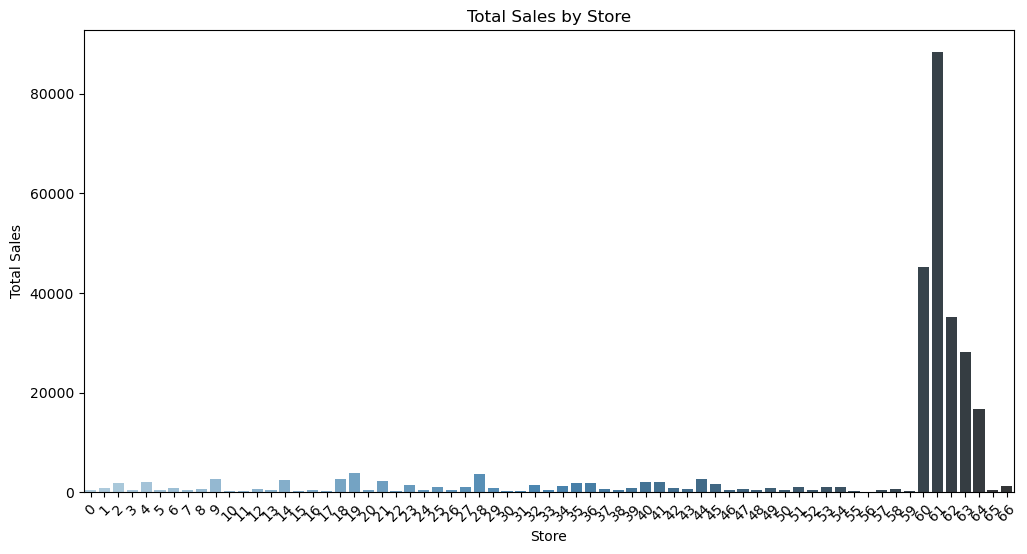

In [24]:

sales_by_store = sales.groupby('Store')['Sales'].sum()

# Sales by Store
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_store.index, y=sales_by_store.values, palette='Blues_d')
plt.xticks(rotation=45)
plt.title('Total Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.show()

C:\Users\PRiba\AppData\Local\Temp\ipykernel_28268\487556062.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_product.index, y=sales_by_product.values, palette='Reds_d')


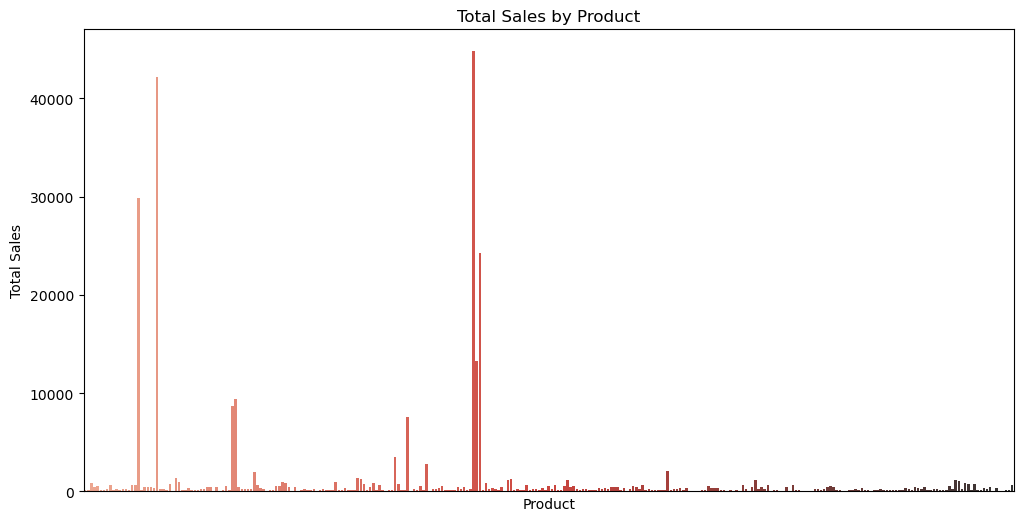

In [25]:
sales_by_product = sales.groupby('Product')['Sales'].sum()

# Plot histogram for sales by Product
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_product.index, y=sales_by_product.values, palette='Reds_d')
plt.xticks([])  # Hides all x-axis labels
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.show()

## Global Sales Trend

<Axes: title={'center': 'Total Weekly Sales'}, xlabel='Date'>

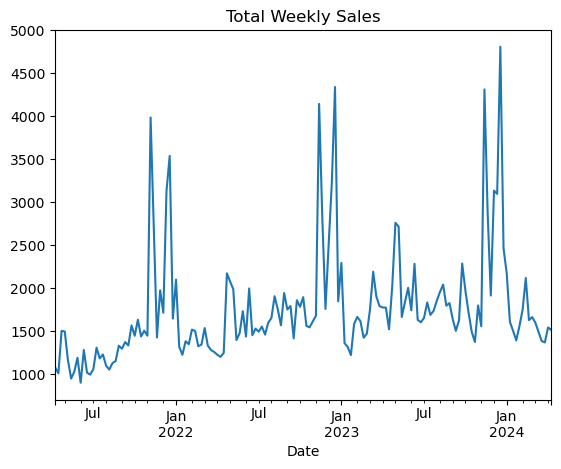

In [26]:
sales.groupby('Date')['Sales'].sum().plot(title='Total Weekly Sales')

## Intermittent & Volatile Items

In [27]:
sales.groupby(['Store', 'Product'])['Sales'].apply(lambda x: (x==0).mean()).sort_values()

Store  Product
2      124        0.000000
28     17         0.000000
64     17         0.000000
       23         0.000000
35     17         0.000000
                    ...   
61     242        0.745223
56     126        0.751592
61     232        0.757962
       230        0.770701
       231        0.789809
Name: Sales, Length: 599, dtype: float64

### Zeros Proportion

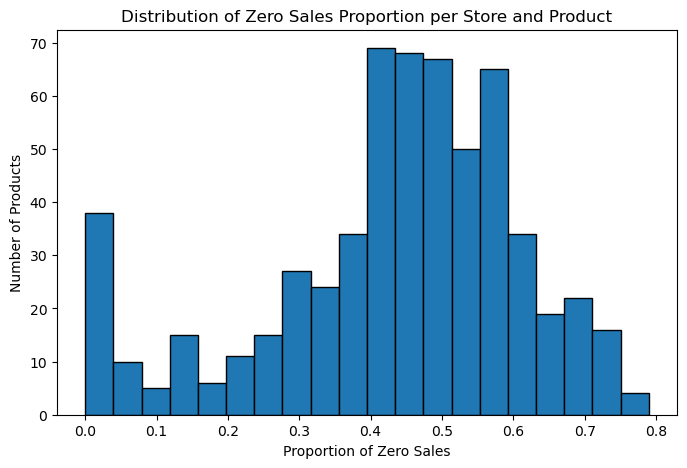

In [28]:
# Calculate proportion of zeros per product
zero_prop = sales.groupby(['Store', 'Product'])['Sales'].apply(lambda x: (x == 0).mean())

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(zero_prop, bins=20, edgecolor='k')
plt.title('Distribution of Zero Sales Proportion per Store and Product')
plt.xlabel('Proportion of Zero Sales')
plt.ylabel('Number of Products')
plt.show()

### Volatility

In [29]:
sales.groupby('Product')['Sales'].std().sort_values(ascending=False)

Product
23     50.748414
125    37.852448
124    28.177166
48     14.123119
47     13.543156
         ...    
205     0.763308
163     0.759125
223     0.751448
195     0.747526
230     0.640895
Name: Sales, Length: 297, dtype: float64

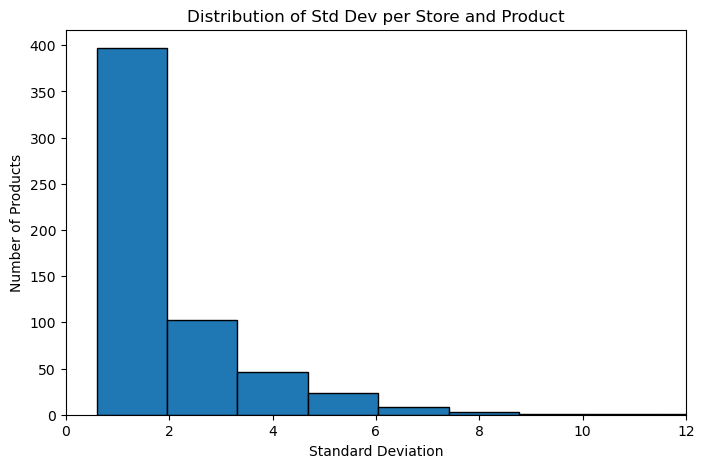

In [ ]:
# Plot Standard Deviation
std_dev = sales.groupby(['Store', 'Product'])['Sales'].std()

plt.figure(figsize=(8,5))
plt.hist(std_dev, bins=50, edgecolor='k')  
plt.title('Distribution of Std Dev per Store and Product')
plt.xlabel('Standard Deviation')
plt.ylabel('Number of Products')
plt.xlim(0, 12)
plt.show()


## Masterdata

In [ ]:
file_path = project_root / 'data' / 'Week0' / 'Week 0 - Master.csv'
master = pd.read_csv(file_path)
print(master.head())

   Store  Product  ProductGroup  Division  Department  DepartmentGroup  \
0      0      126        301202      3012          30               11   
1      0      182        440403      4404          44               11   
2      1      124        240201      2402          24               11   
3      2      124        240201      2402          24               11   
4      2      126        301202      3012          30               11   

   StoreFormat  Format  
0            1      13  
1            1      13  
2            1      13  
3            1      13  
4            1      13  


In [33]:
# Check for missing values
print(master.isna().sum())

# Check for duplicates
print(master.duplicated().sum())

Store              0
Product            0
ProductGroup       0
Division           0
Department         0
DepartmentGroup    0
StoreFormat        0
Format             0
dtype: int64
0


In [34]:
print("Unique Stores:", master['Store'].nunique())
print("Unique Products:", master['Product'].nunique())
print("Unique ProductGroups:", master['ProductGroup'].nunique())
print("Unique Divisions:", master['Division'].nunique())
print("Unique Departments:", master['Department'].nunique())
print("Unique DepartmentGroups:", master['DepartmentGroup'].nunique())
print("Unique StoreFormats:", master['StoreFormat'].nunique())
print("Unique Formats:", master['Format'].nunique())

Unique Stores: 67
Unique Products: 297
Unique ProductGroups: 111
Unique Divisions: 47
Unique Departments: 26
Unique DepartmentGroups: 6
Unique StoreFormats: 3
Unique Formats: 3


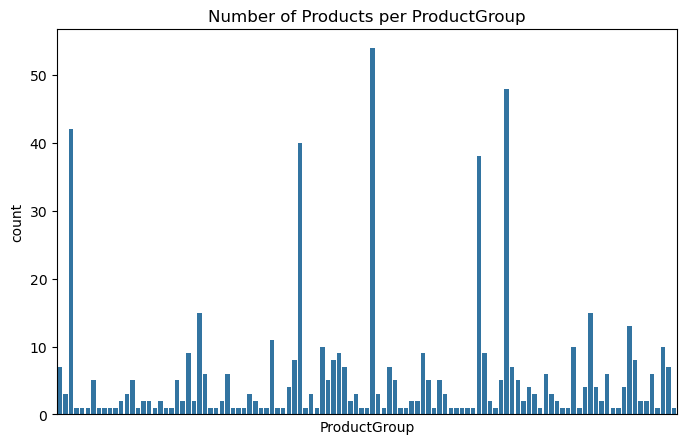

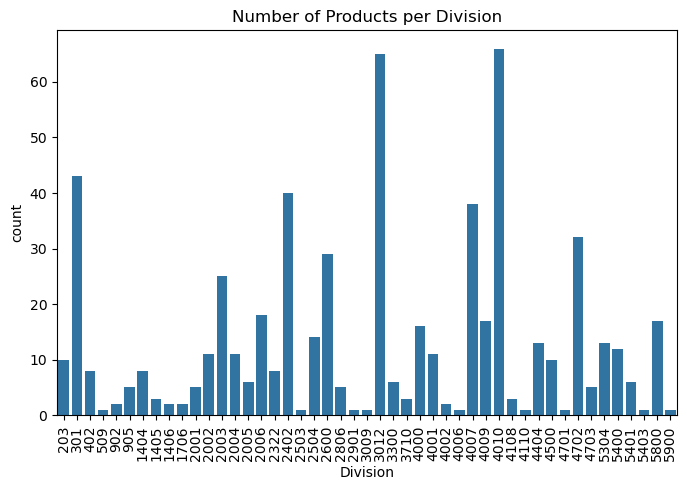

In [36]:
# Products per ProductGroup
plt.figure(figsize=(8,5))
sns.countplot(x='ProductGroup', data=master)
plt.xticks([])
plt.title('Number of Products per ProductGroup')
plt.show()

# Divisions
plt.figure(figsize=(8,5))
sns.countplot(x='Division', data=master)
plt.xticks(rotation=90)
plt.title('Number of Products per Division')
plt.show()


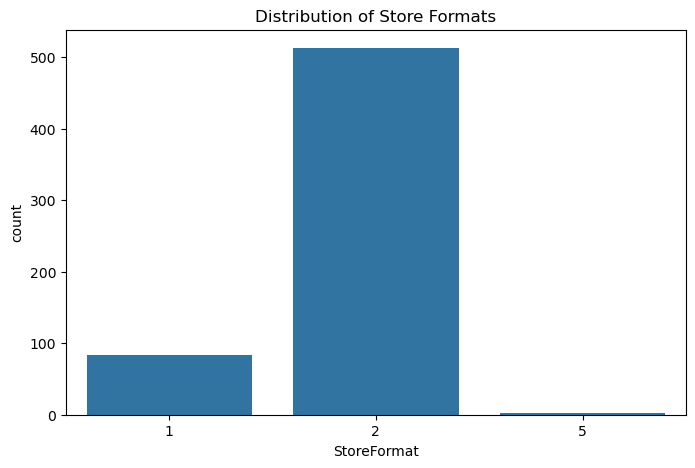

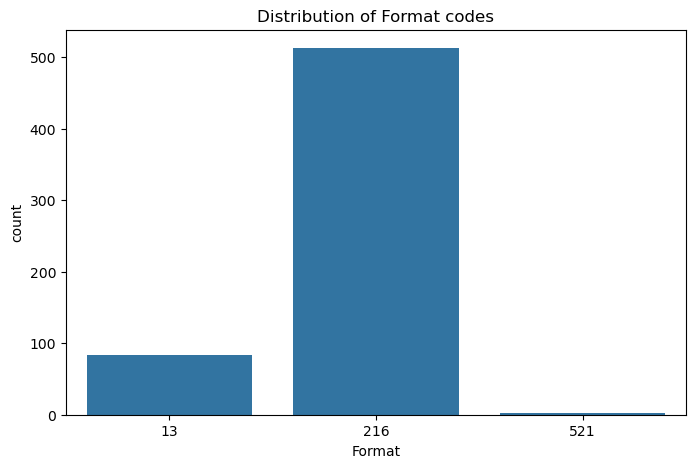

In [39]:
# Distribution of StoreFormats
plt.figure(figsize=(8,5))
sns.countplot(x='StoreFormat', data=master)
plt.title('Distribution of Store Formats')
plt.show()

# Distribution of Format codes
plt.figure(figsize=(8,5))
sns.countplot(x='Format', data=master)
plt.title('Distribution of Format codes')
plt.show()